In [1]:
import os
import re
import pandas as pd
# matplotlib

In [2]:
data_root = 'sources'

txt = [
    {
        'path': os.path.join(data_root, x),
        'date': '2022' + x[:4]
    }
    for x in os.listdir(data_root) if 'detail' not in x and x.endswith('.txt')]
txt = sorted(txt, key=lambda x: x['date'])
for elem in txt:
    elem['content'] = open(elem['path']).read()

In [3]:
def include_nubmer(s):
    return not not re.search(r'\d+', s)


assert include_nubmer('23')
assert not include_nubmer('ab')


def intent_wuzhengzhuang(line):
    if '境外' in line:
        return
    if '新增' not in line:
        return
    if '无症状感染' not in line:
        return
    if '例' not in line:
        return
    if not include_nubmer(line):
        return
    if '确诊病例' in line:
        return
    n = re.findall(r'\d+', line)
    return {
        'intent': '无症状感染者',
        'number': int(n[-1]),  # 一般最后一个数字才是，前面的数字是日期
        'source': line,
    }

def intent_quezhen(line):
    line = re.sub(r'治愈出院\d+例', '治愈出院xx例', line)
    line = re.sub(r'含\d+例由无症状', '含xx例由无症状', line)
    line = re.sub(r'\d+月\d+日已通报', 'x月x日已通报', line)
    if not line.startswith('2022'):
        return
    if '境外' in line:
        return
    if '新冠肺炎确诊病例' not in line:
        return
    if '累计本土确诊' in line:
        return
    if not include_nubmer(line):
        return
    n = re.findall(r'\d+', line)
    return {
        'intent': '确诊病例',
        'number': 0 if '无新增本土' in line else int(n[-1]),  # 一般最后一个数字才是，前面的数字是日期
        'source': line,
    }

In [4]:
wuzhengzhuang = []
for elem in txt:
    date = elem['date']
    c = elem['content']
    lines = c.split('\n')
    for l in lines:
        i = intent_wuzhengzhuang(l)
        if i:
            print(i)
            wuzhengzhuang.append(i)
            i['date'] = date

{'intent': '无症状感染者', 'number': 1, 'source': '2022年2月24日0—24时，新增本土无症状感染者1例。'}
{'intent': '无症状感染者', 'number': 1, 'source': '2022年2月25日0—24时，新增本土无症状感染者1例。'}
{'intent': '无症状感染者', 'number': 1, 'source': '2022年2月26日0—24时，新增本土无症状感染者1例。'}
{'intent': '无症状感染者', 'number': 1, 'source': '2022年2月27日0—24时，新增本土无症状感染者1例。'}
{'intent': '无症状感染者', 'number': 3, 'source': '2022年2月28日0—24时，新增本土无症状感染者3例。'}
{'intent': '无症状感染者', 'number': 1, 'source': '2022年3月1日0—24时，新增本土无症状感染者1例。'}
{'intent': '无症状感染者', 'number': 5, 'source': '2022年3月2日0—24时，新增本土无症状感染者5例。'}
{'intent': '无症状感染者', 'number': 14, 'source': '2022年3月3日0—24时，新增本土无症状感染者14例。'}
{'intent': '无症状感染者', 'number': 16, 'source': '2022年3月4日0—24时，新增本土无症状感染者16例。'}
{'intent': '无症状感染者', 'number': 28, 'source': '2022年3月5日0—24时，新增本土无症状感染者28例。'}
{'intent': '无症状感染者', 'number': 45, 'source': '2022年3月6日0—24时，新增本土无症状感染者45例。'}
{'intent': '无症状感染者', 'number': 51, 'source': '2022年3月7日0—24时，新增本土无症状感染者51例。'}
{'intent': '无症状感染者', 'number': 62, 'source': '2022年3月8日0—24时，新增本土无症状感染者62

<AxesSubplot:xlabel='date'>

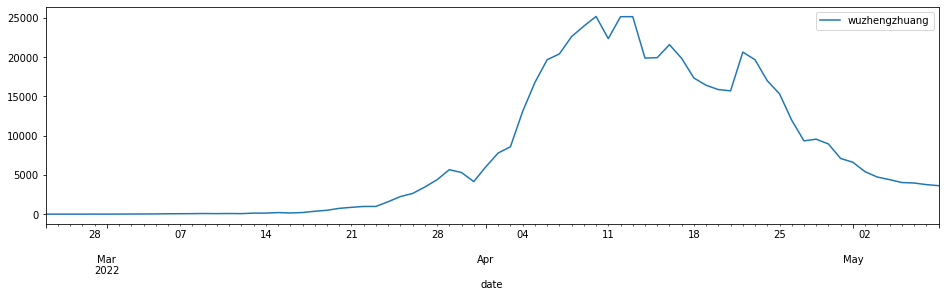

In [5]:
wuzhengzhuang_df = pd.DataFrame(wuzhengzhuang)
wuzhengzhuang_df.index = pd.to_datetime(wuzhengzhuang_df['date'])
wuzhengzhuang_df = wuzhengzhuang_df[['number']]
wuzhengzhuang_df.columns = ['wuzhengzhuang']
wuzhengzhuang_df.to_csv('无症状感染者.csv')
wuzhengzhuang_df.plot(y=['wuzhengzhuang'], figsize=(16, 4))

In [6]:
quezhen = []
for elem in txt:
    date = elem['date']
    c = elem['content']
    lines = c.split('\n')
    for l in lines:
        i = intent_quezhen(l)
        if i:
            print(i)
            quezhen.append(i)
            i['date'] = date

{'intent': '确诊病例', 'number': 0, 'source': '2022年2月24日0—24时，无新增本土新冠肺炎确诊病例。'}
{'intent': '确诊病例', 'number': 0, 'source': '2022年2月25日0—24时，无新增本土新冠肺炎确诊病例。'}
{'intent': '确诊病例', 'number': 0, 'source': '2022年2月26日0—24时，无新增本土新冠肺炎确诊病例。'}
{'intent': '确诊病例', 'number': 0, 'source': '2022年2月27日0—24时，无新增本土新冠肺炎确诊病例。'}
{'intent': '确诊病例', 'number': 0, 'source': '2022年2月28日0—24时，无新增本土新冠肺炎确诊病例。'}
{'intent': '确诊病例', 'number': 1, 'source': '2022年3月1日0—24时，新增本土新冠肺炎确诊病例1例（x月x日已通报）。'}
{'intent': '确诊病例', 'number': 3, 'source': '2022年3月2日0—24时，新增本土新冠肺炎确诊病例3例。（x月x日已通报）'}
{'intent': '确诊病例', 'number': 2, 'source': '2022年3月3日0—24时，新增本土新冠肺炎确诊病例2例。（x月x日已通报）'}
{'intent': '确诊病例', 'number': 3, 'source': '2022年3月4日0—24时，新增本土新冠肺炎确诊病例3例。（x月x日已通报）'}
{'intent': '确诊病例', 'number': 0, 'source': '2022年3月5日0—24时，无新增本土新冠肺炎确诊病例。'}
{'intent': '确诊病例', 'number': 3, 'source': '2022年3月6日0—24时，新增本土新冠肺炎确诊病例3例。（x月x日已通报）'}
{'intent': '确诊病例', 'number': 4, 'source': '2022年3月7日0—24时，新增本土新冠肺炎确诊病例4例。（x月x日已通报）'}
{'intent': '确诊病例', 'number': 3, 'so

<AxesSubplot:xlabel='date'>

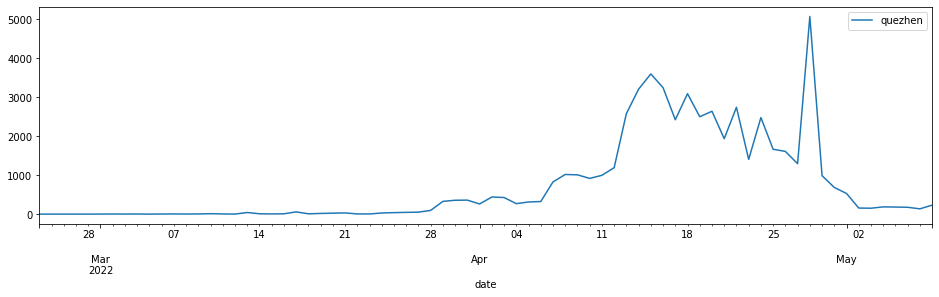

In [7]:
quezhen_df = pd.DataFrame(quezhen)
quezhen_df.index = pd.to_datetime(quezhen_df['date'])
quezhen_df = quezhen_df[['number']]
quezhen_df.columns = ['quezhen']
quezhen_df.to_csv('确诊病例.csv')
quezhen_df.plot(y=['quezhen'], figsize=(16, 4))

In [8]:
ganranzhe = quezhen_df.merge(wuzhengzhuang_df, left_index=True, right_index=True)
ganranzhe['all'] = ganranzhe['quezhen'] + ganranzhe['wuzhengzhuang']
ganranzhe.to_csv('所有感染者.csv')

In [9]:
ganranzhe.tail()

,quezhen,wuzhengzhuang,all
date,,,
2022-05-04,185,4390,4575
2022-05-05,181,4024,4205
2022-05-06,175,3961,4136
2022-05-07,135,3760,3895
2022-05-08,230,3625,3855


<AxesSubplot:xlabel='date'>

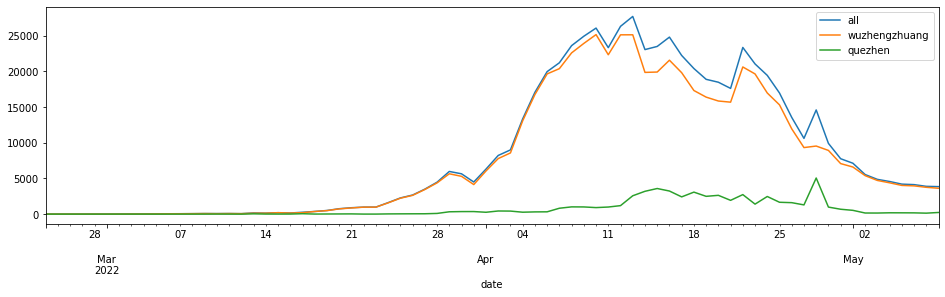

In [10]:
ganranzhe.plot(y=['all', 'wuzhengzhuang', 'quezhen'], figsize=(16, 4))